In [1]:
import numpy as np
import pandas as pd
from utils.utils import load_datasets
from utils.utils import select_features
from models.model_regression import Stacking_Regression
from plotting.plotting_regression import plots_regression
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# loading the datasets 
load_data = load_datasets()
# regression
Xr_train, Xr_test, yr_train, yr_test = load_data.regression_dataset()
# classification 
Xc_train, Xc_test, yc_train, yc_test = load_data.classification_dataset()


In [3]:
# selecting the relevant features 
sel = select_features()
sel_features_reg = sel.selection(Xr_train, yr_train)
sel_features_class = sel.selection(Xc_train, yc_train)

Xr_train, Xr_test = sel.df_feature_selection(Xr_train, Xr_test, sel_features_reg)
Xc_train, Xc_test = sel.df_feature_selection(Xc_train, Xc_test, sel_features_class)

### Regression Comparison

In [4]:
# building the models 
model_builder_reg = Stacking_Regression()
RF_model_reg = model_builder_reg.RF_model()
GB_model_reg = model_builder_reg.GB_model()
Stack_model_reg = model_builder_reg.Stack_model()

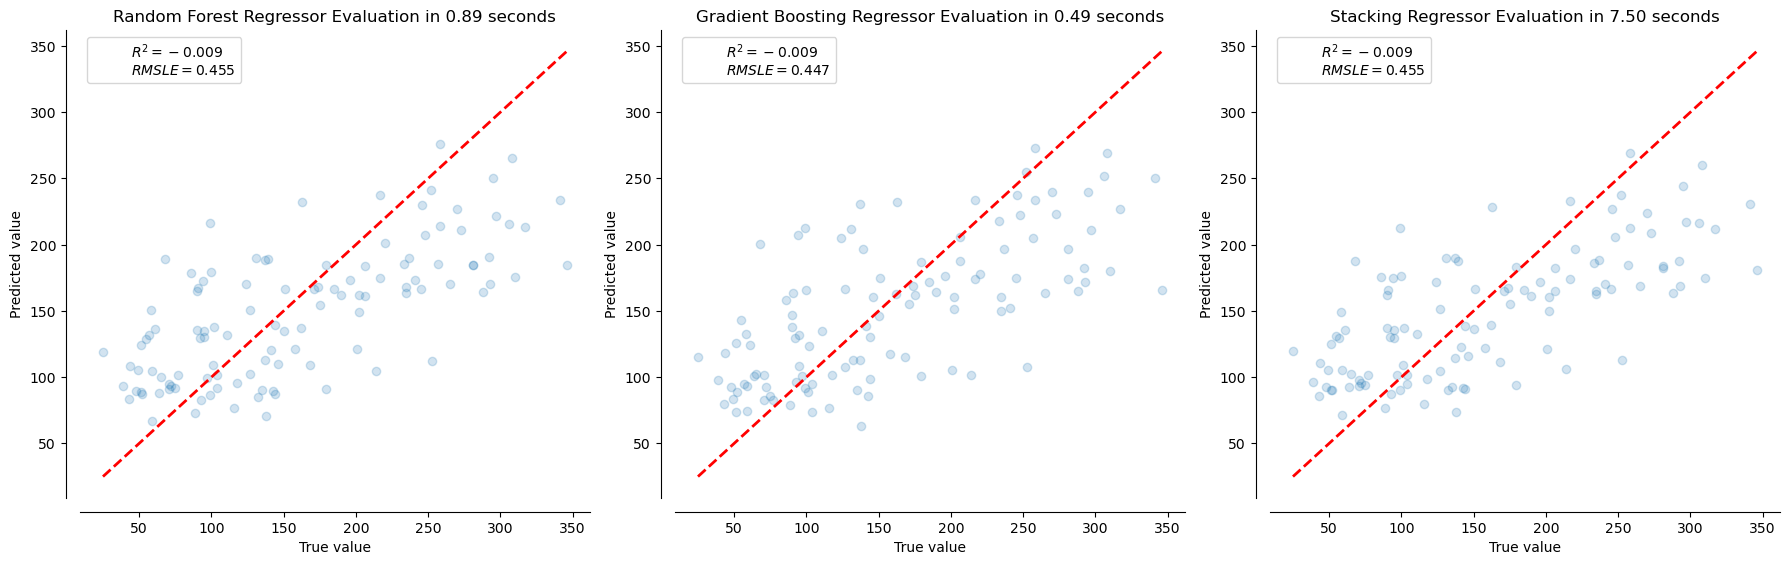

In [5]:
# plotting the results
models_reg = [('Random Forest Regressor', RF_model_reg),
            ('Gradient Boosting Regressor', GB_model_reg),
            ('Stacking Regressor', Stack_model_reg)]
plotter_reg = plots_regression(Xr_train, yr_train, Xr_test, yr_test)
plotter_reg.plot_comparison_regression(models_reg)


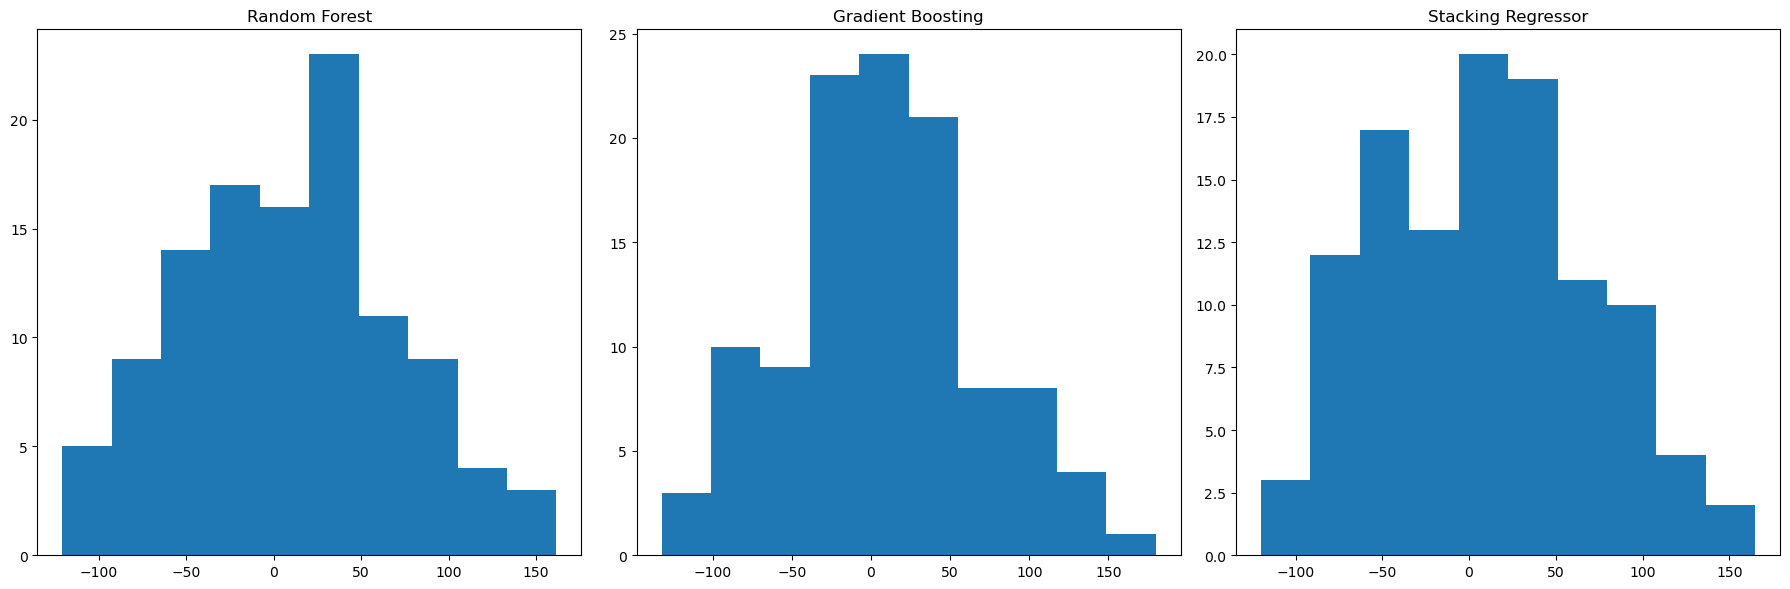

In [6]:
plotter_reg.plot_error(models_reg)

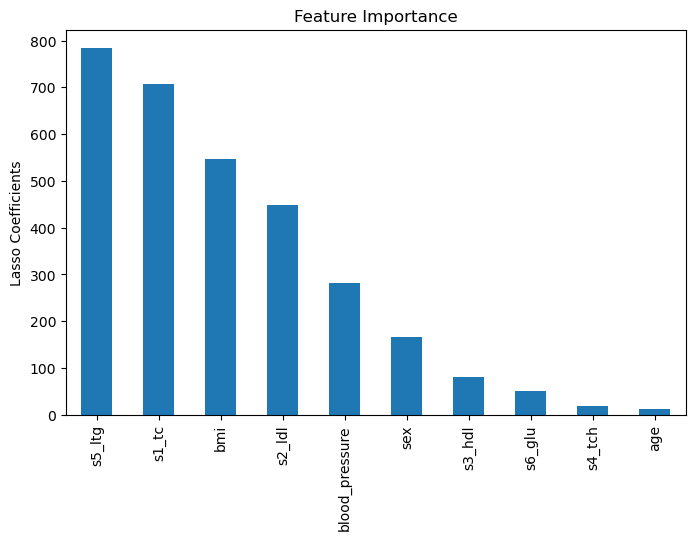

In [7]:
# plot feature importance
plotter_reg.plot_feature_importance(sel_features_reg)

### Classification Comparison